In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

df = pd.read_csv('loan_cleaned_data_final.csv')
df.head()

C:\Users\CheeKHWQWJ\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\CheeKHWQWJ\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Verified,36 months,A to C,Own,5 years and below,more than 5 years,debt_consolidation
0,5000,5000,4975.0,10.65,162.87,24.000,0,27.65,0,1,3,0,13648,83.7,9,1,1,1,0,0,1,0
1,2500,2500,2500.0,15.27,59.83,30.000,1,1.00,0,5,3,0,1687,9.4,4,1,0,1,0,1,0,0
2,2400,2400,2400.0,15.96,84.33,12.252,0,8.72,0,2,2,0,2956,98.5,10,0,1,1,0,0,1,0
3,5000,5000,5000.0,7.90,156.46,36.000,0,11.20,0,3,9,0,7963,28.3,12,1,1,1,0,1,0,0
4,3000,3000,3000.0,18.64,109.43,48.000,0,5.35,0,2,4,0,8221,87.5,4,1,1,0,0,0,1,0


In [2]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

In [5]:
from sklearn import svm
clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
from sklearn import metrics
pred = clf.predict(X_test)
auc = metrics.roc_auc_score(y_test, pred) 
print(auc)

0.516123330429


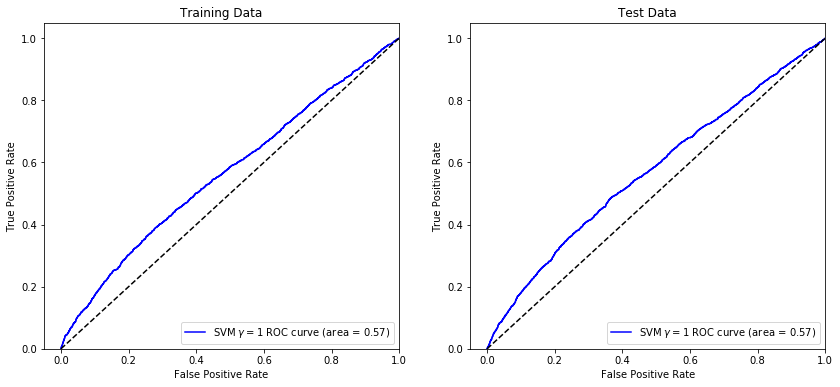

In [7]:
from sklearn.metrics import auc 
from sklearn.metrics import roc_curve
y_train_score3 = clf.decision_function(X_train) 
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b') 
ax1.set_title('Training Data')      


y_test_score3 = clf.decision_function(X_test) 
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3) 
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)
ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b') 
ax2.set_title('Test Data')
for ax in fig.axes: 
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([-0.05, 1.0]) 
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate') 
    ax.set_ylabel('True Positive Rate') 
    ax.legend(loc="lower right")

In [10]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([ 1.,  1.,  1.,  1.,  1.])